In [2]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

imagePath = 'Lenna.png'

Matplotlib is building the font cache; this may take a moment.


In [3]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [4]:
# Read the image
img = cv2.imread(imagePath, cv2.IMREAD_COLOR) # Read the image as a color image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert the image from BGR to RGB
print("image Dimension ={}".format(img.shape))
print("image type ={}".format(img.dtype))

image Dimension =(512, 512, 3)
image type =uint8


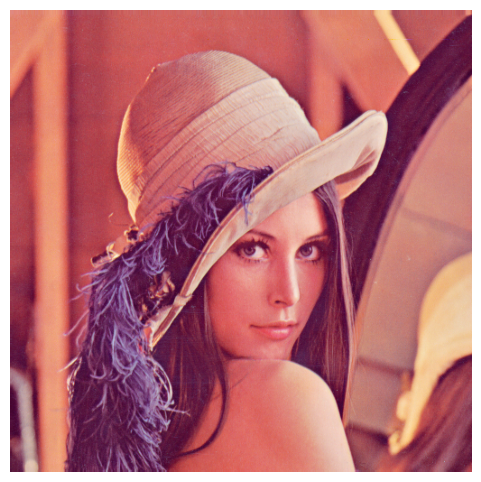

In [5]:
# plot the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
h, w, c = img.shape 
# Reshape image
pixels = img.reshape(-1, 3)

In [7]:
pixels.shape

(262144, 3)

In [8]:
compressed_img = 100*np.ones_like(img) # create empty image with the same size as the original image
print("image Dimension ={}".format(compressed_img.shape))
print("image type ={}".format(compressed_img.dtype))

image Dimension =(512, 512, 3)
image type =uint8


In [9]:
# Initialize 16 centroids randomly within 0-255
k = 16
centroids = np.random.randint(0, 256, (k, 3))

In [ ]:
# TODO: implement your algorithm here and store the result in compressed_img
# ---- Step 1: Euclidean Distance Function ----
def euclidienne_function(point, centroid) :
  return np.sqrt(np.sum((point - centroid) ** 2)) 


# ---- Step 2: Assign Pixels to the Closest Centroid ----
def assign_clusters(pixels, centroids) :
    lists = []
    for point in pixels :
        distances = [euclidienne_function(point, centroid) for centroid in centroids ]
        closest_centrois = np.argmin(distances)  # Get the index of the nearest centroid
        lists.append(closest_centrois)
    return lists

# ---- Step 3: Recalculate Centroids ----
def recalculate_centroids(pixels, centroids, labels) :
    new_centroids = np.zeros((k, 3))
    for i in range(k) :
        assigned_points  = pixels[labels == i] # all points assigned to cluster i
        if len(assigned_points ) > 0 :
            new_centroids[i] = np.mean(assigned_points, axis = 0) # compute mean
    return new_centroids


# ---- Step 4: Run K-Means Algorithm ----
max_iterations = 10
for i in range(max_iterations) :
  labels = assign_clusters(pixels, centroids) # Assign pixels to the closest centroid
  new_centroids = recalculate_centroids(pixels, centroids, labels)  # Recalculate centroids 

  # Check for convergence
  if np.all(centroids == new_centroids) :
    print(f"Centroids converged after {i + 1} iterations")
    break
  
  centroids = new_centroids # Update centroids

In [ ]:
# ---- Step 5: Replace Pixels with Their Cluster's Centroid ----
compressed_pixels = np.array([centroids[label] for label in labels], dtype=np.uint8)
compressed_img = compressed_pixels.reshape(h, w, c)  # Reshape to original dimensions

Note : K-Means Clustering will group similar colors in the image finding the dominant colors.

In [ ]:
# ---- Step 6: Display Original and Compressed Image ----
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis("off")

# plot the compressed image
axes[1].imshow(compressed_img)
axes[1].set_title("Compressed Image (K-Means, k=16)")
axes[1].axis("off")
plt.show()

In [ ]:
# write image to disk
cv2.imwrite('output.jpg', compressed_img)